In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis.gensim
import re
import nltk
from nltk.stem.porter import *
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import gensim
from gensim import corpora, models
import pickle
from sklearn.feature_extraction.text import CountVectorizer
# from lda import guidedlda as glda
import numpy as np
from text_mining import preprocess_sent, preprocess_word, lda_topic_model, word_cloud, dominant_topic, show_topic

%matplotlib inline


C:\Users\zhipe\Anaconda3\envs\tm\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
data = pd.read_pickle("../ETL/data.pkl")
data.head()
data.columns

Index(['id', 'name', 'seller', 'price', 'original_price', 'lectures', 'hours',
       'level', 'enrollment', 'rating', 'num_ratings', 'five_stars',
       'four_stars', 'three_stars', 'two_stars', 'description',
       'hours_ondemand_video', 'downloadable_resources', 'last_update_date',
       'instructor_title', 'instructor_job_title', 'instructor_info',
       'instructor_rating', 'instructor_no_reviews', 'instructor_no_students',
       'instructor_no_courses'],
      dtype='object')

## LDA for course description

In [3]:
pd_docs = data[["id","description"]].copy()
pd_docs["description"].fillna(" ", inplace=True)
text_lists = [preprocess_sent(text) for text in pd_docs["description"].to_list()]
token_lists = [preprocess_word(text) for text in text_lists]
LDA_model, corpus, dictionary = lda_topic_model(token_lists, 10,"LDA_model.gensim")

(0, '0.023*"analyt" + 0.022*"power" + 0.019*"busi" + 0.015*"bi" + 0.015*"custom" + 0.013*"compani" + 0.010*"decis" + 0.009*"masterclass" + 0.009*"descript" + 0.009*"insight"')
(1, '0.026*"curso" + 0.022*"power" + 0.021*"bi" + 0.011*"descript" + 0.011*"requir" + 0.011*"show" + 0.010*"dato" + 0.008*"b" + 0.008*"aprend" + 0.007*"sico"')
(2, '0.058*"sql" + 0.037*"databas" + 0.022*"report" + 0.019*"power" + 0.013*"bi" + 0.011*"postgr" + 0.011*"server" + 0.010*"use" + 0.009*"requir" + 0.009*"descript"')
(3, '0.020*"googl" + 0.019*"analyt" + 0.015*"queri" + 0.014*"studio" + 0.013*"requir" + 0.013*"descript" + 0.012*"sql" + 0.012*"databas" + 0.009*"show" + 0.008*"knowledg"')
(4, '0.023*"tabl" + 0.021*"sa" + 0.019*"pivot" + 0.019*"excel" + 0.010*"requir" + 0.010*"analyt" + 0.009*"descript" + 0.009*"function" + 0.008*"show" + 0.007*"macro"')
(5, '0.043*"busi" + 0.027*"analysi" + 0.023*"requir" + 0.016*"learn" + 0.015*"python" + 0.014*"r" + 0.014*"descript" + 0.013*"process" + 0.011*"show" + 0.01

Plot word cloud of all texts


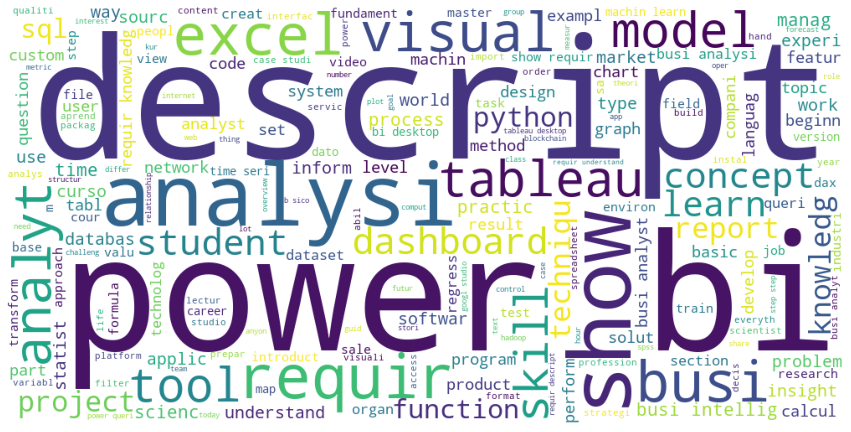

In [4]:
print("Plot word cloud of all texts")
word_cloud(token_lists)

In [5]:
text_topic_df = dominant_topic(LDA_model, corpus, pd_docs["description"],"text_topics.csv")
text_topic_df.head(3)

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Abstract
0,2.0,0.9830,"sql, databas, report, power, bi, postgr, serve...",Use SQL to query a database Use SQL to perform...
1,9.0,0.9616,"tableau, visual, power, dashboard, bi, chart, ...",Install Tableau Desktop 2020 Connect Tableau t...
2,9.0,0.9864,"tableau, visual, power, dashboard, bi, chart, ...",At the end of this course students will be abl...


Show topic, No.  0
Keywords analyt, power, busi, bi, custom, compani, decis, masterclass, descript, insight
Aprender los conceptos b sicos de BI  Business Intelligence  Desarrollar gr ficos y cuadros de mando con Tableau Desktop Crear vistas dentro de Tableau Realizar an lisis de datos mediante gr ficos y reportes Implementar fuentes de datos y combinarlas Aprender a desarrollar historias con Tableau Crear c lculos para aplicarlos a los gr ficos Implementar procedimientos ETL con Tableau Prep Limpiar datos con Tableau Prep y prepararlos para Tableau Desktop Requirements Conocimientos b sicos de Inform tica Un PC con 4G de RAM y 100G de almacenamiento Conexi n a Internet     Muchas ganas de aprender     Description Hola, ¡¡¡Bienvenido al curso de Tableau Desktop y Tableau Prep desde cero!!! En este curso aprenderás a crear  presentaciones visuales y a realizar análisis de datos con Tableau Desktop. Además también veremos como realizar flujos de transformación de datos con Tableau Prep, 

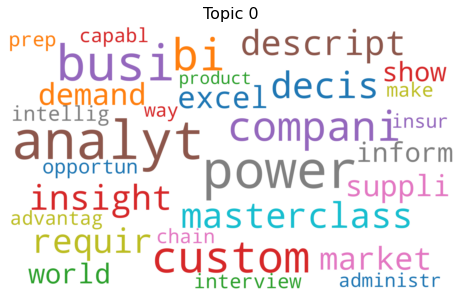

In [6]:
show_topic(text_topic_df,LDA_model, 0,3)

In [7]:
print("Document counts in each topic")
print(text_topic_df['Dominant_Topic'].value_counts().sort_index())

Document counts in each topic
0.0     33
1.0    123
2.0     22
3.0     83
4.0     29
5.0    246
6.0    123
7.0     90
8.0     20
9.0    240
Name: Dominant_Topic, dtype: int64


In [8]:
corpus_lda = LDA_model[corpus]
description_LDA = pd.DataFrame([[topic[1] for topic in doc]
                                        if doc != [] else [0,0]
                                        for doc in corpus_lda])
description_LDA.columns = ["descr_LDA_"+str(i) for i in range(10)]
description_LDA.fillna(0,inplace=True)
description_LDA.head()

,descr_LDA_0,descr_LDA_1,descr_LDA_2,descr_LDA_3,descr_LDA_4,descr_LDA_5,descr_LDA_6,descr_LDA_7,descr_LDA_8,descr_LDA_9
0,0.983013,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.024603,0.961594,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.986360,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.070038,0.161993,0.758629,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.093454,0.569995,0.128113,0.199612,0.0,0.0,0.0,0.0,0.0,0.0


## LDA for Instructor Information

In [9]:
pd_docs = data[["id","instructor_info"]].copy()
pd_docs["instructor_info"].fillna(" ", inplace=True)
text_lists = [preprocess_sent(text) for text in pd_docs["instructor_info"].to_list()]
token_lists = [preprocess_word(text) for text in text_lists]
LDA_model, corpus, dictionary = lda_topic_model(token_lists, 10,"LDA_model.gensim")

(0, '0.038*"cours" + 0.028*"scienc" + 0.019*"show" + 0.019*"univers" + 0.015*"analyt" + 0.015*"technolog" + 0.014*"market" + 0.013*"student" + 0.012*"team" + 0.010*"r"')
(1, '0.034*"financ" + 0.023*"analyt" + 0.020*"cours" + 0.019*"career" + 0.015*"student" + 0.015*"firm" + 0.014*"show" + 0.012*"analysi" + 0.012*"countri" + 0.012*"academi"')
(2, '0.030*"analyt" + 0.023*"show" + 0.022*"year" + 0.020*"busi" + 0.016*"cours" + 0.015*"experi" + 0.013*"peopl" + 0.013*"compani" + 0.013*"scientist" + 0.012*"research"')
(3, '0.051*"busi" + 0.027*"experi" + 0.027*"manag" + 0.025*"analyt" + 0.024*"year" + 0.018*"show" + 0.016*"project" + 0.014*"consult" + 0.014*"train" + 0.013*"compani"')
(4, '0.011*"scienc" + 0.011*"show" + 0.008*"rené" + 0.008*"python" + 0.008*"econom" + 0.007*"busi" + 0.006*"year" + 0.006*"analyt" + 0.006*"partner" + 0.006*"research"')
(5, '0.014*"área" + 0.014*"show" + 0.010*"year" + 0.009*"tech" + 0.009*"é" + 0.007*"curso" + 0.007*"technolog" + 0.007*"flipkart" + 0.007*"stan

Plot word cloud of all texts


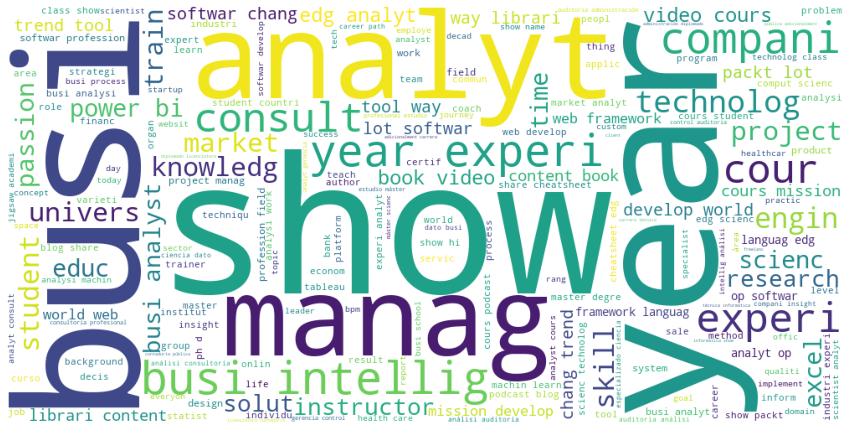

In [10]:
print("Plot word cloud of all texts")
word_cloud(token_lists)

In [11]:
text_topic_df = dominant_topic(LDA_model, corpus, pd_docs["instructor_info"],"text_topics.csv")
text_topic_df.head(3)

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Abstract
0,3.0,0.8148,"busi, experi, manag, analyt, year, show, proje...",Jose Marcial Portilla has a BS and MS in Mec...
1,0.0,0.9437,"cours, scienc, show, univers, analyt, technolo...","Hi there, We are the Ligency PR and Marketing ..."
2,9.0,0.7944,"softwar, develop, analysi, cours, tool, web, a...",Experience as (Web) Developer Starting out at ...


Show topic, No.  0
Keywords cours, scienc, show, univers, analyt, technolog, market, student, team, r
Dr. Geoffrey Hubona has held full-time tenure-track, and tenured, assistant and associate professor faculty positions at 4 major state universities in the United States since 1993. Currently, he is an associate professor of MIS at Texas A&M International University where he teaches for-credit courses on Business Data Visualization (undergrad), Advanced Programming using R (graduate), and Data Mining and Business Analytics (graduate). In previous academic faculty positions, he taught dozens of various statistics, business information systems, and computer science courses to undergraduate, master's and Ph.D. students. He earned a Ph.D. in Business Administration (Information Systems and Computer Science) from the University of South Florida (USF) in Tampa, FL; an MA in Economics, also from USF; an MBA in Finance from George Mason University in Fairfax, VA; and a BA in Psychology from the

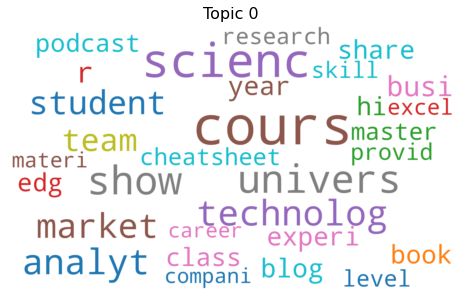

In [12]:
show_topic(text_topic_df,LDA_model, 0,3)

In [13]:
print("Document counts in each topic")
print(text_topic_df['Dominant_Topic'].value_counts().sort_index())

Document counts in each topic
0.0    143
1.0     45
2.0    134
3.0    245
4.0     34
5.0     25
6.0    114
7.0     68
8.0     40
9.0    161
Name: Dominant_Topic, dtype: int64


In [14]:
corpus_lda = LDA_model[corpus]
instructor_LDA = pd.DataFrame([[topic[1] for topic in doc]
                                        if doc != [] else [0,0]
                                        for doc in corpus_lda])
instructor_LDA.columns = ["instr_LDA_"+str(i) for i in range(10)]
instructor_LDA.fillna(0,inplace=True)

,instr_LDA_0,instr_LDA_1,instr_LDA_2,instr_LDA_3,instr_LDA_4,instr_LDA_5,instr_LDA_6,instr_LDA_7,instr_LDA_8,instr_LDA_9
0,0.075875,0.814652,0.096257,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.943746,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.170735,0.794474,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.970963,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.978047,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data = data.drop(["id","name","seller","description","hours_ondemand_video","last_update_date","instructor_info", "instructor_title","instructor_job_title","instructor_rating","instructor_no_reviews", "instructor_no_students"], axis = 1)
data = pd.concat([data, description_LDA,instructor_LDA], axis=1)


In [16]:
data.head()


,price,original_price,lectures,hours,level,enrollment,rating,num_ratings,five_stars,four_stars,...,instr_LDA_0,instr_LDA_1,instr_LDA_2,instr_LDA_3,instr_LDA_4,instr_LDA_5,instr_LDA_6,instr_LDA_7,instr_LDA_8,instr_LDA_9
0,25.99,179.99,83.0,9.0,All Levels,342288.0,4.7,91772.0,0.60,0.33,...,0.075875,0.814652,0.096257,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.99,124.99,82.0,9.0,All Levels,231631.0,4.6,61533.0,0.60,0.33,...,0.943746,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.99,94.99,275.0,23.5,Beginner,148077.0,4.6,43339.0,0.54,0.38,...,0.170735,0.794474,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19.99,139.99,117.0,11.0,All Levels,109303.0,4.6,30899.0,0.61,0.33,...,0.970963,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.99,94.99,413.0,20.5,All Levels,136869.0,4.5,28595.0,0.52,0.37,...,0.978047,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
